<img src="escuela-de-economia.png" width="260" height="60">
<center>
    <b>EC4301 MACROECONOMETRÍA</b><br>
    <b>Profesor:  Randall Romero Aguilar, PhD</b>
<br><br>
<b>Laboratorio:</b>
<div style="font-size:175%;color:white; background-color: #0064b0;">Tema 3: Modelos ARMA</div>
<div style="font-size:250%;color:white; background-color: #0064b0;">Estimación de un modelo ARMA de inflación para Costa Rica</div> 
</center>
<i>Creado:     2020-Abr-18 
    <br>
    Actualizado: 2020-Sep-08</i>

## Descarga de datos

In [1]:
if 'google.colab' in str(get_ipython()):
    print("Este cuaderno está corriendo en Google Colab. Es necesario instalar el paquete bccr para obtener los datos")
    !pip install bccr
else:
    print("Este cuaderno está corriendo localmente.")


Este cuaderno está corriendo localmente.


In [2]:
import bccr
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
consulta = bccr.ServicioWeb()
consulta.buscar(todos='inflación subyacente')

,DESCRIPCION,descripcion,Unidad,Medida,periodo
codigo,,,,,
1264,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1264]')",(ISI) INDICE SUBYACENTE DE INFLACION (BASE JULIO 2006=100),Nivel,NO DEFINIDO,Mensual
1267,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1267]')",INDICE SUBYACENTE DE INFLACION VARIACION INTERANUAL,Porcentaje Variación Interanual,NO DEFINIDO,Mensual
4160,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1264]/Bienes [4160]')",Bienes,Nivel,Unidades,Mensual
27118,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1267]/Bienes [27118]')",Bienes,Porcentaje Variación Interanual,NO DEFINIDO,Mensual
4181,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1264]/Servicios [4181]')",Servicios,Nivel,Unidades,Mensual
27119,"Node('/BCCR/Índices de Precios/Indice Subyacente de inflación (ISI), (Julio 2006 = 100) [1267]/Servicios [27119]')",Servicios,Porcentaje Variación Interanual,NO DEFINIDO,Mensual
24171,Node('/BCCR/Índices de Precios/Inflación subyacente reponderada por persistencia [24171]'),Inflación subyacente reponderada por persistencia,Nivel,Unidades,Mensual
24172,Node('/BCCR/Índices de Precios/Inflación subyacente reponderada por persistencia [24172]'),Inflación subyacente reponderada por persistencia,Porcentaje Variación Interanual,Unidades,Mensual
24174,Node('/BCCR/Índices de Precios/Inflación subyacente reponderada por volatilidad [24174]'),Inflación subyacente reponderada por volatilidad,Nivel,Unidades,Mensual


In [4]:
isi = consulta({'25725':'isi'})
isi

variable,isi
2006-08,0.895052
2006-09,0.236138
2006-10,0.524076
2006-11,0.601677
2006-12,0.730769
...,...
2020-04,-0.110071
2020-05,0.027828
2020-06,0.088650
2020-07,0.150904


## Graficar la serie original y estudiar su autocorrelograma

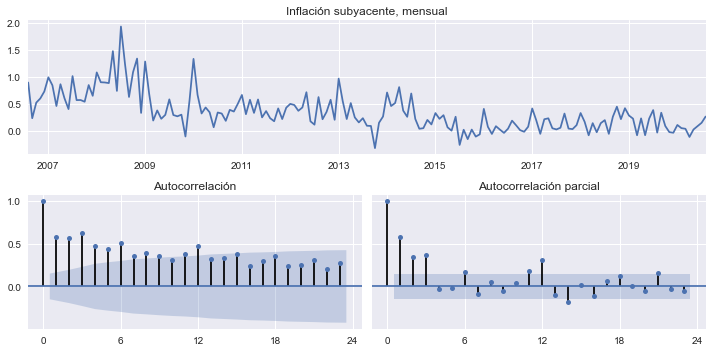

In [5]:
plt.style.use('seaborn')
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = plt.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

isi.plot(ax=ax, title='Inflación subyacente, mensual', legend=None)
plot_acf(isi, ax=axs0, title='Autocorrelación')
plot_pacf(isi, ax=axs1, title='Autocorrelación parcial');
axs0.set_xticks(range(0,30,6))
axs1.set_xticks(range(0,30,6))
fig.savefig('ISI-AR3.pdf', bbox_inches='tight')

## Estimar un modelo AR(3)

In [6]:
res = ARIMA(isi, order=[3,0,0]).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    isi   No. Observations:                  169
Model:                     ARMA(3, 0)   Log Likelihood                  -5.682
Method:                       css-mle   S.D. of innovations              0.249
Date:                Tue, 08 Sep 2020   AIC                             21.364
Time:                        15:34:51   BIC                             37.013
Sample:                    08-31-2006   HQIC                            27.714
                         - 08-31-2020                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3534      0.102      3.462      0.001       0.153       0.553
ar.L1.isi      0.2565      0.072      3.561      0.000       0.115       0.398
ar.L2.isi      0.1998      0.073      2.719      0.007       0.056       0.344
ar.L3.isi      0.3657      0.072      5.085      0.000       0.225       0.507
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0947           -0.0000j            1.0947           -0.0000
AR.2           -0.8206           -1.3508j            1.5805           -0.3369
AR.3           -0.8206           +1.3508j            1.5805            0.3369
-----------------------------------------------------------------------------
"""

#### Exportar la tabla de coeficientes a LaTeX

In [7]:
sss = res.summary()

with open('AR3-ISI.tex','w') as file:
    file.write(sss.tables[1].as_latex_tabular())

#### Analizar los residuos

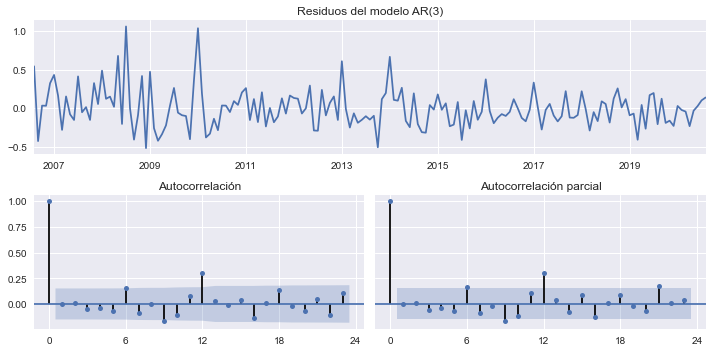

In [8]:
fig = plt.figure(figsize=[10,5], tight_layout=True)
gs = plt.GridSpec(2, 2)
ax = fig.add_subplot(gs[0, :])
axs0 = fig.add_subplot(gs[1,0])
axs1 = fig.add_subplot(gs[1,1], sharey=axs0)

res.resid.plot(ax=ax, title='Residuos del modelo AR(3)', legend=None)
plot_acf(res.resid, ax=axs0, title='Autocorrelación')
plot_pacf(res.resid, ax=axs1, title='Autocorrelación parcial');
axs0.set_xticks(range(0,30,6))
axs1.set_xticks(range(0,30,6))
fig.savefig('ISI-AR3resid.pdf', bbox_inches='tight')

### Raíces del polinomio característico (recíprocos de las raíces del polinomio de rezagos)

In [9]:
1 / res.arroots

array([ 0.91349523+0.j        , -0.32849495+0.54076043j,
       -0.32849495-0.54076043j])

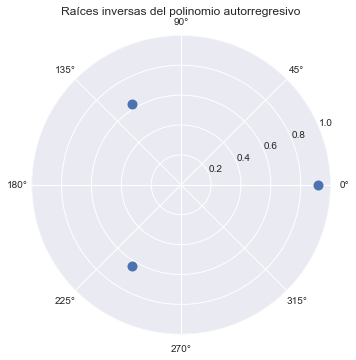

In [10]:
arroots = 1/res.arroots

plt.polar(np.angle(arroots), np.abs(arroots), '.', ms=20)
fig = plt.gcf()
ax = fig.gca()
ax.set_rlim([0,1])
ax.set_title('Raíces inversas del polinomio autorregresivo')
fig.savefig('ISI-AR3roots.pdf', bbox_inches='tight')

## Usar criterios de selección para determinar el grado p, q del modelo ARMA

In [11]:
pmax = 4
qmax = 2
P = np.arange(pmax+1)
Q = np.arange(qmax+1)

### Akaike

In [12]:
aic = [[ARIMA(isi, order=[p,0,q]).fit().aic for q in Q ] for p in P ]
AIC = pd.DataFrame(aic, index=[f'p={p}' for p in P], columns=[f'q={q}' for q in Q])
AIC

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


,q=0,q=1,q=2
p=0,130.288947,89.398523,82.910528
p=1,62.134105,27.484236,28.667236
p=2,43.281187,28.955902,31.172354
p=3,21.363594,23.231781,25.056868
p=4,23.218263,25.144066,21.499874


Exportar a LATEX

In [13]:
AIC.round(2).to_latex('ISI-AR3aic.tex')

### Bayesiano

In [14]:
bic = [[ARIMA(isi, order=[p,0,q]).fit().bic for q in Q ] for p in P ]
BIC = pd.DataFrame(bic, index=[f'p={p}' for p in P], columns=[f'q={q}' for q in Q])
BIC

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


,q=0,q=1,q=2
p=0,136.548744,98.788219,95.430123
p=1,71.523801,40.003831,44.316730
p=2,55.800782,44.605396,49.951746
p=3,37.013087,42.011173,46.966159
p=4,41.997655,47.053357,46.539064


Exportar a LATEX

In [15]:
BIC.round(2).to_latex('ISI-AR3bic.tex')

## Pronóstico

In [16]:
horizon = 36
ff, std, conf = res.forecast(steps=horizon, alpha=0.05)

#### Valores críticos de la distribución normal

In [17]:
from scipy.stats import norm

In [18]:
alpha = np.arange(1,6)/10
zvalues = norm(0, 1).isf(np.array(alpha)/2)

#### Graficar el pronóstico

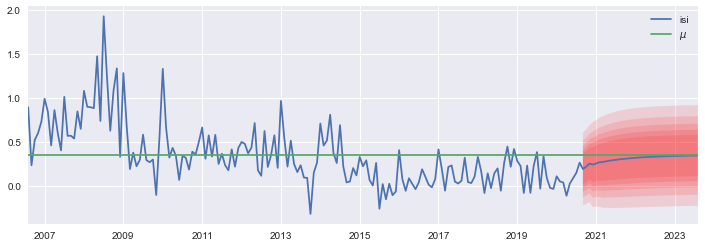

In [19]:

# Datos pronosticados
fcast = pd.DataFrame({'isi':ff,'std':std}, index=pd.period_range(isi.index[-1]+1, periods=horizon, freq='M'))

# Concatenar los datos observados con los pronosticados
fcast2 = pd.concat([isi,fcast], sort=False)
fcast2['$\mu$'] = isi.values.mean()

# Graficar la serie y el pronóstico
fig, ax =plt.subplots(figsize=[12,4])
fcast2[['isi','$\mu$']].plot(ax=ax)



def intervalo(z):
    """
    Para calcular los límites superior e inferior del intervalo de confianza,
    dado el valor crítico de la distribución normal
    """
    return fcast2['isi']+z*fcast2['std'],  fcast2['isi']-z*fcast2['std']

# fechas para graficar los intervalos
d = fcast2.index.values

# Graficar los intervalos de confianza
for z in zvalues:
    ax.fill_between(d, *intervalo(z), facecolor='red', alpha=0.12, interpolate=True)

fig.savefig('ISI-AR3forecast.pdf', bbox_inches='tight')    

# Exportar datos a STATA

In [20]:
isi.index = isi.index.to_series().astype(str)
isi.to_stata('isi.dta')